# RunShell Input File Generator

In [2]:
%reload_ext autoreload
%autoreload 2


## create dir

In [29]:
import os
sim_name = 'gamma4'

cwd        = os.getcwd()
output_dir = os.path.join(cwd, 'NewSims', sim_name)
os.makedirs(output_dir, exist_ok=True)

# print(os.getcwd())
# print("Contents of", os.path.dirname(output_dir), "→", os.listdir(os.path.dirname(output_dir)))
# print("Contents of", output_dir, "→", os.listdir(output_dir))

[autoreload of generate_inputs failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/basic_env/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/basic_env/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/basic_env/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/yaelcohen/Library/CloudStorage/GoogleDrive-yael.cohen26@mail.huji.ac.il/My Drive/phd/simulation/generate_inputs.py", line 31, in <module>
    tols=(tolu,tolv)):
          ^^^^
NameError: name 'tolu' is not defined
]


## create all input files

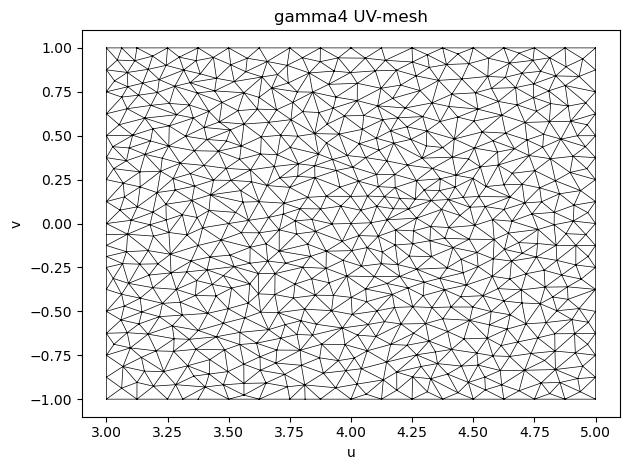

In [30]:
from generate_inputs import *

domain_params = [ 3, 5, -1, 1 ]
create_input_files(
    sim_name     = sim_name,
    output_dir   = output_dir,
    domain_type  = 'rectangle',
    domain_params = domain_params,
    max_area     = 0.005,
    tols = (0,0)
)


## Initial configuration

In [31]:

from generate_inputs import plot_uv_surface, func_to_matlab_str
x = lambda u,v: u
y = lambda u,v: v
z = lambda u,v: 0 #np.sin(u)*np.cos(v)
umin = domain_params[0]
umax = domain_params[1]
vmin = domain_params[2] 
vmax = domain_params[3]
# plot_uv_surface(x, y, z, uxmin, umax, vmin, vmax)

xpos = func_to_matlab_str(x)  
ypos = func_to_matlab_str(y)
zpos = func_to_matlab_str(z) 
print(xpos)
print(ypos)
print(zpos)


u
v
0


## GammaBar

In [32]:
import sympy as sp
from generate_inputs import calc_Gamma

u = sp.Symbol('u')
v = sp.Symbol('v')

#  example metric 
a = sp.Matrix([[1, 0], [0, u**2]])
Gamma_str = calc_Gamma(a, u, v)

print(Gamma_str)

[[['0', '0'], ['0', '-u']], [['0', '1./u'], ['1./u', '0']]]


## Params

In [33]:
thickness = 0.1
YoungsModulus = 10
PoisonRatio = 0.3
# "Lamme parameters" for connection energy
lambdaG = 1000
muG = 1000


## Generate RunShell input file

In [34]:
from generate_inputs import make_in_file
output_dir = os.path.join(cwd, 'NewSims', sim_name)
params = {
    'vertices_file': os.path.relpath(os.path.join(output_dir, f"{sim_name}_Vertices"), os.getcwd()),
    'faces_file':  os.path.relpath(os.path.join(output_dir, f"{sim_name}_Faces"), os.getcwd()),
    'loops':50000,
    'save_every':400,
    'abar':['1','0','0','1'],
    'bbar':['0','0','0','0'],
    'thickness':str(thickness),
    'E':str(YoungsModulus),
    'nu':str(PoisonRatio),
    'pos0':[xpos,ypos,zpos],
    'lambdaG':str(lambdaG),
    'muG':str(muG),
    'gamma':Gamma_str,
    'thickness_adjust':'10',
    'metric_adjust':'5',
    'restart':'1'
}
in_file = make_in_file(params, output_dir, sim_name)



# Run

In [ ]:
in_file_path = os.path.relpath(in_file, os.getcwd())
!./RunShell < {in_file_path}


NonEuclideanShell::NonEuclideanShell()   Number of Nodes = 674
[DEBUG] isfixed value summary:
   -2 → 623 vertices
   -1 → 51 vertices
NonEuclideanShell::NonEuclideanShell()   Number of Faces = 1277
	The initial bending energy is 0
	The initial stretching energy is 1.07066022619544e-35
	The initial connection energy is 4.21537473016366
0% Done: The current energy is 4.21113657015915
0% Done: The current energy is 4.37009809543999
1% Done: The current energy is 4.53737155093255
